In [20]:
# ============ pivot() ============
data = {'Date': ['2021-01-01', '2021-01-01', '2021-01-02', '2021-01-02'],
        'City': ['A', 'B', 'A', 'B'],
        'Temperature': [25, 30, 22, 28]}

df = pd.DataFrame(data)
pivot_df = df.pivot(index='Date', columns='City', values='Temperature')

print(df)
print()
print(pivot_df)


         Date City  Temperature
0  2021-01-01    A           25
1  2021-01-01    B           30
2  2021-01-02    A           22
3  2021-01-02    B           28

City         A   B
Date              
2021-01-01  25  30
2021-01-02  22  28


In [8]:
# download dos dados
import urllib.request
import os
from google.colab import drive

drive.mount('/content/drive')
download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
  print('Downloading', filename)
  url = download_root + 'datasets/lifesat/' + filename
  urllib.request.urlretrieve(url, '/content/drive/MyDrive/Colab Notebooks/datasets/' + filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd

# carregando os dados
oecd_bli = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/gdp_per_capita.csv", thousands=',',
                            delimiter='\t', encoding='latin1', na_values='n/a')

In [15]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [16]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [21]:
# preparando os dados
def prepare_country_stats(oecd_bli, gdp_per_capita):
  oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"] # mantém linhas quando ["INEQUALITY"] == "TOT"
  oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value") # reorganiza o dataframe
  gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True) # renomeia a coluna 2015 para GDP per capita
  gdp_per_capita.set_index("Country", inplace=True) # a coluna Country será o índice do dataframe
  # fusão dos dataframes
  full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                left_index=True, right_index=True)
  full_country_stats.sort_values(by="GDP per capita", inplace=True) # ordena o dataframe pelo atributo GPD per capita
  remove_indices = [0, 1, 6, 8, 33, 34, 35] # remoção dos índices de países específicos
  keep_indices = list(set(range(36)) - set(remove_indices)) # retirando os índices e mantém os outros
  # retorna um dataframe apenas com as colunas abaixo mantendo os índices selecionados na linha acima
  return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


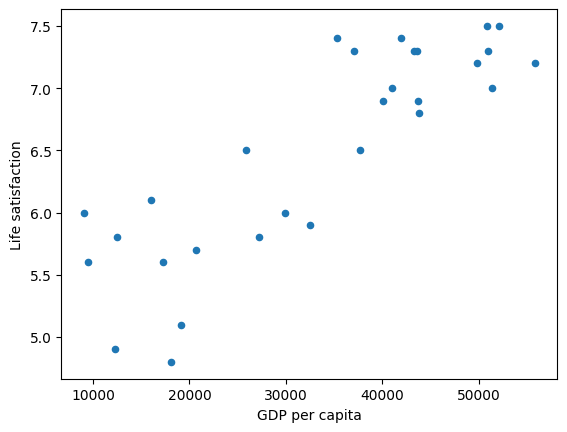

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# visualizando os dados
x = np.c_[country_stats['GDP per capita']] # transformamos os valores em um array
y = np.c_[country_stats['Life satisfaction']]

country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [25]:
import sklearn.linear_model

lin_model = sklearn.linear_model.LinearRegression()
lin_model.fit(x, y)
# previsão para Chifre
x_new = [[22587]] # esse é o valor do GDP per capita de Chifre
print(lin_model.predict(x_new))

[[5.96242338]]


In [27]:
import sklearn.neighbors
kn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
kn_model.fit(x, y)
# previsão para Chifre
x_new = [[22587]] # esse é o valor do GDP per capita de Chifre
print(kn_model.predict(x_new))

[[5.76666667]]
